In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('googleplaystore.csv')

In [3]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


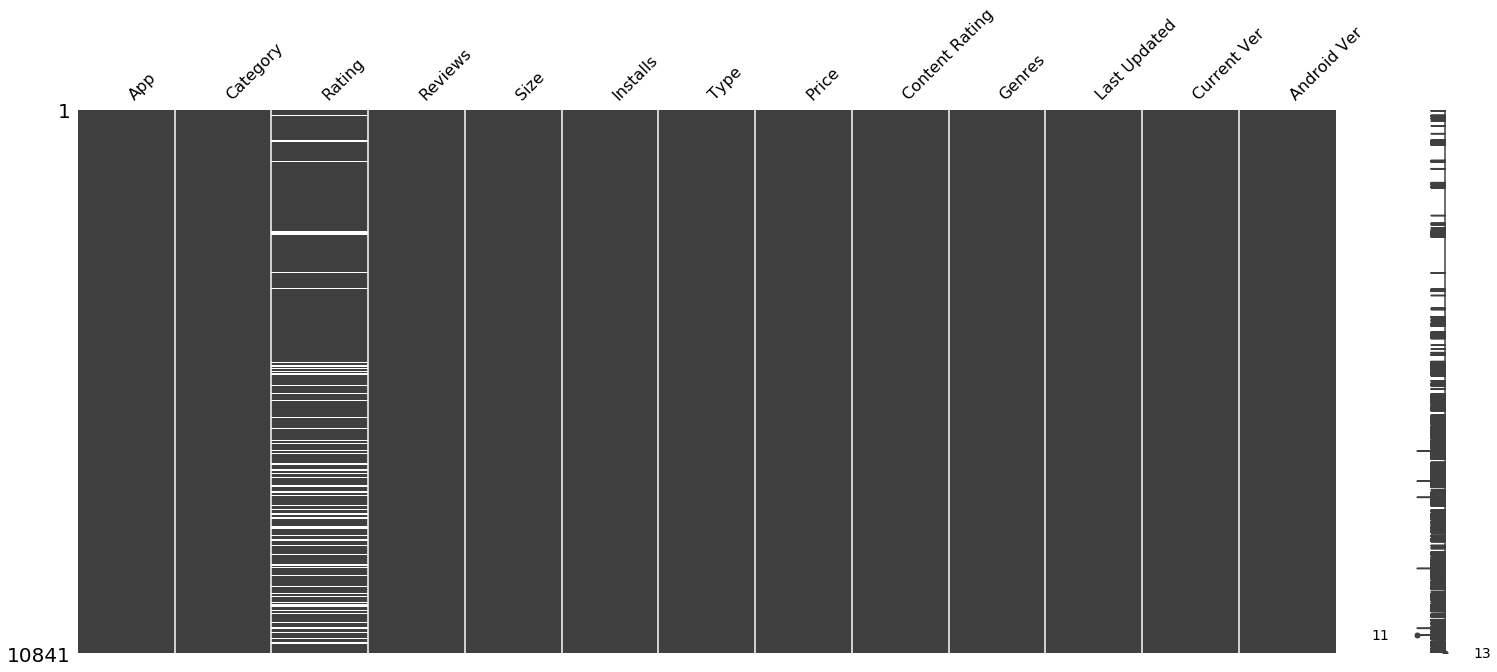

In [189]:
import missingno
missingno.matrix(dataset)

In [9]:
dataset.shape

(10841, 13)

In [16]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
dataset.Rating.isna().value_counts()

False    9367
True     1474
Name: Rating, dtype: int64

In [65]:
#REPLACING MISSING VALUE BY MEAN VALUES
dataset.Rating.fillna(np.mean(dataset.Rating), inplace=True)

In [31]:
dataset.Rating.isna().value_counts()

False    10841
Name: Rating, dtype: int64

In [36]:
dataset.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [110]:
# ONE HOT ENCODING
dataset = pd.concat([dataset,pd.get_dummies(dataset['Category'], prefix='category')],axis=1)
dataset.drop(['Category'],inplace=True,axis=1)

In [72]:
dataset.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,category_PERSONALIZATION,category_PHOTOGRAPHY,category_PRODUCTIVITY,category_SHOPPING,category_SOCIAL,category_SPORTS,category_TOOLS,category_TRAVEL_AND_LOCAL,category_VIDEO_PLAYERS,category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.Size = dataset.Size.str.extract('(\d*)')

In [111]:
dataset.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,category_PERSONALIZATION,category_PHOTOGRAPHY,category_PRODUCTIVITY,category_SHOPPING,category_SOCIAL,category_SPORTS,category_TOOLS,category_TRAVEL_AND_LOCAL,category_VIDEO_PLAYERS,category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


In [113]:
#REMOVING NOISY DATA
dataset.drop(['App'],inplace=True, axis=1)

In [114]:
dataset.Installs = dataset.Installs.str.extract('(\d*)')

In [115]:
dataset.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,...,category_PERSONALIZATION,category_PHOTOGRAPHY,category_PRODUCTIVITY,category_SHOPPING,category_SOCIAL,category_SPORTS,category_TOOLS,category_TRAVEL_AND_LOCAL,category_VIDEO_PLAYERS,category_WEATHER
0,4.1,159,19,10,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14,500,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8,5,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25,50,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2,100,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,...,0,0,0,0,0,0,0,0,0,0


In [116]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['Type'], prefix='type')],axis=1)
dataset.drop(['Type'],inplace=True,axis=1)

In [117]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['Content Rating'], prefix='content_rating')],axis=1)
dataset.drop(['Content Rating'],inplace=True,axis=1)

In [133]:
dataset.Genres.value_counts()

Tools                      842
Entertainment              623
Education                  549
Medical                    463
Business                   460
                          ... 
Racing;Pretend Play          1
Comics;Creativity            1
Lifestyle;Pretend Play       1
Entertainment;Education      1
February 11, 2018            1
Name: Genres, Length: 120, dtype: int64

In [160]:
dataset = pd.concat([dataset, dataset.Genres.str.split(';', expand=True)], axis=1)
dataset.drop(['Genres'],inplace=True,axis=1)
dataset.drop(['Price'],inplace=True,axis=1)
dataset.rename(columns={0: "genre_1", 1: "genre_2"}, inplace=True)

In [161]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated,Current Ver,Android Ver,genre_1,genre_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity


In [180]:
dataset = pd.concat([dataset, dataset['Android Ver'].str.split(' ', expand=True)], axis=1)
dataset.drop(['Android Ver'],inplace=True,axis=1)
dataset.rename(columns={0: "Version",1:"drop_1",2:"drop_2"}, inplace=True)
dataset.drop(["drop_1","drop_2"],inplace=True,axis=1)

In [181]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4
